In [53]:
import gensim
from gensim import corpora
from gensim import models
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# 1. Data import

In [40]:
file = open('data_week10.txt', 'r')
data_lst = []

while True:
    line = file.readline()
    if not line:
        break
    data_lst.append(line.strip())
    
file.close()

In [41]:
data_lst

['cute kitty',
 'eat rice cake',
 'kitty hamster',
 'eat bread',
 'rice bread cake',
 'cute hamster eat bread cake']

# 2. 토큰화 및 벡터화 (사전생성 및 말뭉치 생성)

In [43]:
texts = [[word for word in document.split()]
        for document in data_lst]

dictionary = corpora.Dictionary(texts)                    # 사전 생성 (토큰화)
print(dictionary)

Dictionary(7 unique tokens: ['cute', 'kitty', 'cake', 'eat', 'rice']...)


7 unique tokesn: ['cute', 'kitty', 'cake', 'eat', 'rice', 'bread', 'hamster']

In [45]:
corpus = [dictionary.doc2bow(text) for text in texts]     # 말뭉치 생성 (벡터화)
print('corpus : {}'.format(corpus))

corpus : [[(0, 1), (1, 1)], [(2, 1), (3, 1), (4, 1)], [(1, 1), (5, 1)], [(3, 1), (6, 1)], [(2, 1), (4, 1), (6, 1)], [(0, 1), (2, 1), (3, 1), (5, 1), (6, 1)]]


# 3. 토픽 수 결정



In [50]:
perplexity_values = []
for i in range(2, 8):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, 
                                               id2word = dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

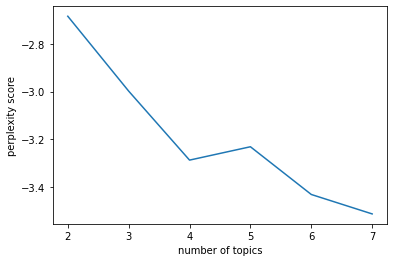

In [51]:
x = range(2, 8)
plt.plot(x, perplexity_values)
plt.xlabel('number of topics')
plt.ylabel('perplexity score')
plt.show()

In [61]:
coherence_values = []
for i in range(2, 8):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, 
                                               id2word = dictionary)
    
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts,
                                        dictionary = dictionary, topn=3)
    
    coherence_lda = coherence_model_lda.get_coherence()
    
    coherence_values.append(coherence_lda)

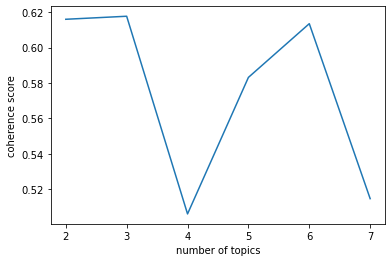

In [62]:
x = range(2, 8)
plt.plot(x, coherence_values)
plt.xlabel('number of topics')
plt.ylabel('coherence score')
plt.show()

In [74]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.616
Num Topics = 3  has Coherence Value of 0.6177
Num Topics = 4  has Coherence Value of 0.506
Num Topics = 5  has Coherence Value of 0.5832
Num Topics = 6  has Coherence Value of 0.6135
Num Topics = 7  has Coherence Value of 0.5146


# 4. 토픽 모델링

In [87]:
lda = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, 
        num_topics=3)                   # 모델구축

for t in lda.show_topics(num_words = 3):  # 주제마다 출현 확률이 높은 단어 순으로 출력
    print(t)

(0, '0.206*"kitty" + 0.204*"eat" + 0.202*"hamster"')
(1, '0.277*"kitty" + 0.270*"cute" + 0.095*"bread"')
(2, '0.245*"cake" + 0.176*"bread" + 0.174*"eat"')
